In [ ]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased30featureswopressure.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
clf=SVC(kernel='linear')
#clf = svm.SVC(decision_function_shape='ovo')    # linear SVM
correct = 0
fscoreTotal =0
print(scaled_data.shape[1])
plt.figure(figsize=(16, 8))
accuracy = plt.subplot(221)

x=np.array([])
y=np.array([])
f1val=np.array([])
numoffeatures= lambda start, end: range(start, end+1)
for i in numoffeatures(3,scaled_data.shape[1]):
    for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
        idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=i)

        # obtain the dataset on the selected features
        features = scaled_data[:, idx[0:i]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
        clf.fit(features[train], target[train])

        # predict the class labels of test data
        y_predict = clf.predict(features[test])
        print("metrics")
        # obtain the classification accuracy on the test data
        acc = accuracy_score(target[test], y_predict)
        correct = correct + acc
        fscore=f1_score(target[test], y_predict,average='weighted')
        fscoreTotal=fscoreTotal+fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
        #report = classification_report(target[test], y_predict)
        #print(report)
    x=np.append(x,i)
    accscores=float(correct)/5
    f1scores=float(fscoreTotal)/5
    y=np.append(y,accscores)
    f1val=np.append(f1val,f1scores)
    np.savetxt('exp3.txt', (y,f1val), fmt='%.5g', delimiter=',', newline='\n')
    print("loop ",i)
    print("f1 ",f1scores)
    # output the average classification accuracy over all 10 folds
    print("Accuracy:", accscores)
    fscore=0
    acc=0
    correct=0
    fscoreTotal=0
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
accuracy.plot(x,y)
accuracy.set_title("mRMR feature selection")
accuracy.set_xlim(3, scaled_data.shape[1])
accuracy.set_xlabel("Number of Features")
accuracy.set_ylim(0.4, 0.8)
accuracy.set_ylabel("Classification Accuracy")
f1=plt.subplot(222)
n, c = np.polyfit(x, f1val, 1)
plt.plot(x, f1val, '.')
plt.plot(x, n*x + c, '-')
f1.plot(x,f1val)
f1.set_title("mRMR feature selection")
f1.set_xlim(3, scaled_data.shape[1])
f1.set_xlabel("Number of Features")
f1.set_ylim(0.4, 0.8)
f1.set_ylabel("Classification F1 Score")
plt.show()
print("here")
#score = svc.score(data, target)
##print(svc)
#ranking = rfe.feature_importances_
#print("no of feat",ranking)

,UUID
0,48
1,48
2,48
3,48
4,48


,aLN1,a.2,aLN3,at4,ai5,ae6,aLN7,a58,aLN9,aSH10,...,du2o12,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avga
0,0.017647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2382,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,0.004412
1,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2302,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,0.004167
2,0.017647,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3015,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,0.008333
3,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2361,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,0.008211
4,0.017647,0.015686,0.015686,0.019608,0.015686,0.017647,0.017647,0.0,0.0,0.0,...,2382,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 130 entries, aLN1 to avga
dtypes: float64(54), int64(76)
memory usage: 2.3 MB
initial data info None
data is (2310, 130)
(2310, 130)
(2310,)
130


C:\Users\S\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


metrics


C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
metrics
metrics
metrics
loop  3
f1  0.21366203718807766
Accuracy: 0.2722943722943723
metrics
metrics
metrics
metrics
metrics
loop  4
f1  0.4668496126033941
Accuracy: 0.5
metrics
metrics
metrics
metrics
metrics
loop  5
f1  0.48122783486630133
Accuracy: 0.5125541125541125
metrics
metrics
metrics
metrics
metrics
loop  6
f1  0.474068722922489
Accuracy: 0.5043290043290043
metrics
metrics
metrics
metrics
metrics
loop  7
f1  0.5318955035448361
Accuracy: 0.554978354978355
metrics
metrics
metrics
metrics
metrics
loop  8
f1  0.5395534558282092
Accuracy: 0.5632034632034632
metrics
metrics
metrics
metrics
metrics
loop  9
f1  0.5306624396200694
Accuracy: 0.5536796536796537
metrics
metrics
metrics
metrics
metrics
loop  10
f1  0.5477364646732952
Accuracy: 0.5696969696969696
metrics
metrics
metrics
metrics
metrics
loop  11
f1  0.5478326109002258
Accuracy: 0.5696969696969697
metrics
metrics
metrics
metrics
metrics
loop  12
f1  0.5580668164476151
Accuracy: 0.5774891774891775
metrics
metrics
metr

,UUID
0,48
1,48
2,48
3,48
4,48


,aLN1,a.2,aLN3,at4,ai5,ae6,aLN7,a58,aLN9,aSH10,...,du2o12,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avga
0,0.017647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2382,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,0.004412
1,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2302,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,0.004167
2,0.017647,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3015,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,0.008333
3,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2361,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,0.008211
4,0.017647,0.015686,0.015686,0.019608,0.015686,0.017647,0.017647,0.0,0.0,0.0,...,2382,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 130 entries, aLN1 to avga
dtypes: float64(54), int64(76)
memory usage: 2.3 MB
initial data info None
data is (2310, 130)
(2310, 130)
(2310,)
130


C:\Users\S\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


metrics


C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
metrics
metrics
metrics
loop  41
f1  0.6551619922257612
Accuracy: 0.6606060606060605
metrics
metrics
metrics
metrics
metrics
loop  42
f1  0.6590298112084529
Accuracy: 0.6649350649350649
metrics
metrics
metrics
metrics
metrics
loop  43
f1  0.6579033103718185
Accuracy: 0.6636363636363636
metrics
metrics
metrics
metrics
metrics
loop  44
f1  0.6573580026110791
Accuracy: 0.6636363636363637
metrics
metrics
metrics
metrics
metrics
loop  45
f1  0.6627322585607335
Accuracy: 0.6675324675324675
metrics
metrics
metrics
metrics
metrics
loop  46
f1  0.6633976728510523
Accuracy: 0.6679653679653679
metrics
metrics
metrics
metrics
metrics
loop  47
f1  0.6606151564918805
Accuracy: 0.6653679653679654
metrics
metrics
metrics
metrics
metrics
loop  48
f1  0.6627708023675565
Accuracy: 0.6683982683982683
metrics
metrics
metrics
metrics
metrics
loop  49
f1  0.6715988863508062
Accuracy: 0.677056277056277
metrics
metrics
metrics
metrics
metrics
loop  50
f1  0.6721330609624205
Accuracy: 0.6774891774891774

metrics
metrics
metrics
loop  122
f1  0.6482358229784078
Accuracy: 0.6588744588744588
metrics
metrics
metrics
metrics
metrics
loop  123
f1  0.6464394565760343
Accuracy: 0.6567099567099567
metrics
metrics
metrics
metrics
metrics
loop  124
f1  0.647527170456157
Accuracy: 0.6571428571428571
metrics
metrics
metrics
metrics
metrics
loop  125
f1  0.6446387771246773
Accuracy: 0.6545454545454545
metrics
metrics
metrics
metrics
metrics
loop  126
f1  0.644274255812868
Accuracy: 0.6541125541125541
metrics
metrics
metrics
metrics
metrics
loop  127
f1  0.6438360921821579
Accuracy: 0.6541125541125542
metrics
metrics
metrics
metrics
metrics
loop  128
f1  0.6458687085768827
Accuracy: 0.6558441558441558
metrics
metrics
metrics
metrics
metrics
loop  129
f1  0.6484405610295934
Accuracy: 0.658008658008658
metrics
metrics
metrics
metrics
metrics
loop  130
f1  0.6496966173627747
Accuracy: 0.658874458874459


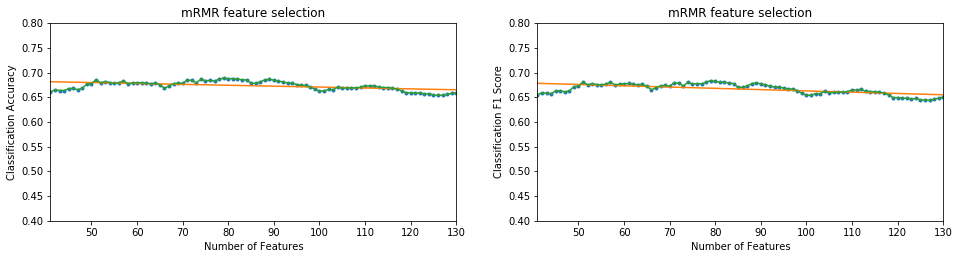

here


In [1]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased30featureswopressure.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
clf=SVC(kernel='linear')
#clf = svm.SVC(decision_function_shape='ovo')    # linear SVM
correct = 0
fscoreTotal =0
print(scaled_data.shape[1])
plt.figure(figsize=(16, 8))
accuracy = plt.subplot(221)

x=np.array([])
y=np.array([])
f1val=np.array([])
numoffeatures= lambda start, end: range(start, end+1)
for i in numoffeatures(41,scaled_data.shape[1]):
    for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
        idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=i)

        # obtain the dataset on the selected features
        features = scaled_data[:, idx[0:i]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
        clf.fit(features[train], target[train])

        # predict the class labels of test data
        y_predict = clf.predict(features[test])
        print("metrics")
        # obtain the classification accuracy on the test data
        acc = accuracy_score(target[test], y_predict)
        correct = correct + acc
        fscore=f1_score(target[test], y_predict,average='weighted')
        fscoreTotal=fscoreTotal+fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
        #report = classification_report(target[test], y_predict)
        #print(report)
    x=np.append(x,i)
    accscores=float(correct)/5
    f1scores=float(fscoreTotal)/5
    y=np.append(y,accscores)
    f1val=np.append(f1val,f1scores)
    np.savetxt('nxtexp3.txt', (y,f1val), fmt='%.5g', delimiter=',', newline='\n')
    print("loop ",i)
    print("f1 ",f1scores)
    # output the average classification accuracy over all 10 folds
    print("Accuracy:", accscores)
    fscore=0
    acc=0
    correct=0
    fscoreTotal=0
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
accuracy.plot(x,y)
accuracy.set_title("mRMR feature selection")
accuracy.set_xlim(41, scaled_data.shape[1])
accuracy.set_xlabel("Number of Features")
accuracy.set_ylim(0.4, 0.8)
accuracy.set_ylabel("Classification Accuracy")
f1=plt.subplot(222)
n, c = np.polyfit(x, f1val, 1)
plt.plot(x, f1val, '.')
plt.plot(x, n*x + c, '-')
f1.plot(x,f1val)
f1.set_title("mRMR feature selection")
f1.set_xlim(41, scaled_data.shape[1])
f1.set_xlabel("Number of Features")
f1.set_ylim(0.4, 0.8)
f1.set_ylabel("Classification F1 Score")
plt.show()
print("here")
#score = svc.score(data, target)
##print(svc)
#ranking = rfe.feature_importances_
#print("no of feat",ranking)

,UUID
0,48
1,48
2,48
3,48
4,48


,aLN1,a.2,aLN3,at4,ai5,ae6,aLN7,a58,aLN9,aSH10,...,du2o12,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avga
0,0.017647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2382,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,0.004412
1,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2302,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,0.004167
2,0.017647,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3015,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,0.008333
3,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2361,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,0.008211
4,0.017647,0.015686,0.015686,0.019608,0.015686,0.017647,0.017647,0.0,0.0,0.0,...,2382,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 130 entries, aLN1 to avga
dtypes: float64(54), int64(76)
memory usage: 2.3 MB
initial data info None
data is (2310, 130)
(2310, 130)
(2310,)


C:\Users\S\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


metrics
             precision    recall  f1-score   support

          0       0.67      0.67      0.67         6
          1       1.00      0.50      0.67         6
          2       0.83      0.83      0.83         6
          3       1.00      0.50      0.67         6
          4       0.38      0.50      0.43         6
          5       1.00      0.83      0.91         6
          6       1.00      0.67      0.80         6
          7       1.00      1.00      1.00         6
          8       0.33      0.67      0.44         6
          9       0.56      0.83      0.67         6
         10       0.40      0.33      0.36         6
         11       0.60      1.00      0.75         6
         12       0.67      1.00      0.80         6
         13       0.86      1.00      0.92         6
         14       0.57      0.67      0.62         6
         15       0.44      0.67      0.53         6
         16       1.00      0.67      0.80         6
         17       0.71      0.83     

C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


metrics
             precision    recall  f1-score   support

          0       0.83      0.83      0.83         6
          1       0.67      0.67      0.67         6
          2       0.67      1.00      0.80         6
          3       0.83      0.83      0.83         6
          4       0.67      0.67      0.67         6
          5       1.00      0.83      0.91         6
          6       1.00      1.00      1.00         6
          7       1.00      1.00      1.00         6
          8       0.18      0.33      0.24         6
          9       0.67      0.33      0.44         6
         10       0.67      0.33      0.44         6
         11       0.50      0.33      0.40         6
         12       0.75      1.00      0.86         6
         13       1.00      0.83      0.91         6
         14       0.56      0.83      0.67         6
         15       0.60      0.50      0.55         6
         16       1.00      0.83      0.91         6
         17       0.83      0.83     

metrics
             precision    recall  f1-score   support

          0       0.60      0.50      0.55         6
          1       0.67      1.00      0.80         6
          2       0.44      0.67      0.53         6
          3       1.00      0.50      0.67         6
          4       0.33      0.33      0.33         6
          5       1.00      1.00      1.00         6
          6       1.00      1.00      1.00         6
          7       0.83      0.83      0.83         6
          8       0.20      0.33      0.25         6
          9       0.33      0.50      0.40         6
         10       0.17      0.17      0.17         6
         11       0.60      1.00      0.75         6
         12       0.42      0.83      0.56         6
         13       1.00      0.83      0.91         6
         14       0.75      1.00      0.86         6
         15       0.50      0.67      0.57         6
         16       1.00      0.67      0.80         6
         17       0.83      0.83     

metrics
             precision    recall  f1-score   support

          0       0.50      0.67      0.57         6
          1       0.62      0.83      0.71         6
          2       0.75      1.00      0.86         6
          3       0.83      0.83      0.83         6
          4       0.67      0.67      0.67         6
          5       1.00      1.00      1.00         6
          6       0.86      1.00      0.92         6
          7       1.00      0.83      0.91         6
          8       0.23      0.50      0.32         6
          9       0.50      0.50      0.50         6
         10       0.29      0.33      0.31         6
         11       1.00      0.83      0.91         6
         12       0.67      0.67      0.67         6
         13       0.62      0.83      0.71         6
         14       0.55      1.00      0.71         6
         15       0.80      0.67      0.73         6
         16       1.00      0.67      0.80         6
         17       0.80      0.67     

metrics
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       0.83      0.83      0.83         6
          2       0.67      0.67      0.67         6
          3       0.57      0.67      0.62         6
          4       0.56      0.83      0.67         6
          5       1.00      1.00      1.00         6
          6       1.00      1.00      1.00         6
          7       0.86      1.00      0.92         6
          8       0.18      0.33      0.24         6
          9       0.45      0.83      0.59         6
         10       0.67      0.33      0.44         6
         11       0.67      1.00      0.80         6
         12       0.55      1.00      0.71         6
         13       1.00      0.83      0.91         6
         14       0.83      0.83      0.83         6
         15       0.55      1.00      0.71         6
         16       1.00      1.00      1.00         6
         17       0.71      0.83     

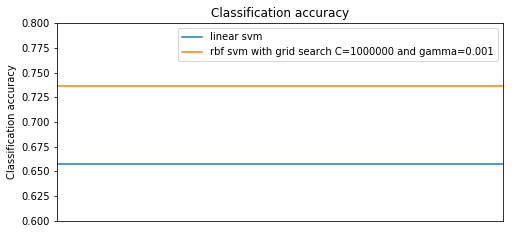

In [8]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased30featureswopressure.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io

from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
'''clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''
plt.figure(figsize=(8, 8))
accuracy = plt.subplot(211)
box=plt.subplot(211)
from sklearn.svm import LinearSVC
clf=SVC(kernel='linear')
#clf=LinearSVC()
rbf=SVC(decision_function_shape='ovo',gamma=0.0001,C=10000000)
correct = 0
fscoreTotal =0
rbf_correct = 0
rbf_fscoreTotal =0
results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=33)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:33]]
        #print(target[train])
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    rbf.fit(features[train], target[train])
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    rbf_y_predict = rbf.predict(features[test])
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    rbf_acc = accuracy_score(target[test], rbf_y_predict)
    correct = correct + acc
    rbf_correct = rbf_correct + rbf_acc
    fscore=f1_score(target[test], y_predict,average='weighted')
    rbf_fscore=f1_score(target[test], rbf_y_predict,average='weighted')
    fscoreTotal=fscoreTotal+fscore
    rbf_fscoreTotal=rbf_fscoreTotal+rbf_fscore
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    rbreport = classification_report(target[test], rbf_y_predict)
    print(rbreport)
    print("each loop acc",acc)
    print("each loop rbf acc",rbf_acc)
score=float(correct)/5
rbfscore=float(rbf_correct)/5
results.append(score)
results.append(rbfscore)
print("f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(correct)/5)
print("f1 ",float(rbf_fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("Accuracy:", float(rbf_correct)/5)

accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [score, score], label="linear svm")
accuracy.plot([scaled_data.shape[1], scaled_data.shape[0]],
              [rbfscore, rbfscore], label="rbf svm with grid search C=1000000 and gamma=0.001")
accuracy.set_title("Classification accuracy")
accuracy.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
accuracy.set_xticks(())
accuracy.set_ylim(0.60, 0.80)
accuracy.set_ylabel("Classification accuracy")
accuracy.legend(loc='best')
##svc=SelectKBest(mutual_info_classif, k=50).fit_transform(data,target)
#svc = SVC(kernel="linear")
#rfe = RFE(estimator=svc, n_features_to_select=10)
#rfe.fit(data, target)
print("here")
box.boxplot(results)
box.set_title("Classification accuracy")
box.set_xlim(scaled_data.shape[1], scaled_data.shape[0])
box.set_xticks(())
box.set_ylim(0.60, 0.80)
box.set_ylabel("Classification accuracy")
box.legend(loc='best')
plt.show()

In [2]:
%matplotlib inline

import lsanomaly
import numpy as np  
import pandas as pd  
from sklearn import utils  
import matplotlib
import matplotlib.pyplot as plt
from IPython.core.display import display

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA, IncrementalPCA


# import the CSV from http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html
# this will return a pandas dataframe.
data = pd.read_csv('C:/Users/S/Documents/PY/increased30featureswopressure.csv', low_memory=False)
'''data.loc[data['UUID'] == "RVTNB1502866560357", "attack"] = 1  
data.loc[data['UUID'] != "RVTNB1502866560357", "attack"] = -1
df_majority = data[data['attack']==-1]
df_minority = data[data['attack']==1]
from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=830,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])

#print(data['attack'].value_counts())'''

#target=np.array(target)
#target = pd.DataFrame(target,columns=['attack'])

#data.drop(["UUID"], axis=1, inplace=True)
categorical_columns=["UUID"]
cate_data = data[categorical_columns]

#for col in data.columns.values:
#    print(col, data[col].unique())

pd.set_option('mode.chained_assignment', None)

def label_encode(cate_data, columns):
    for col in columns:
        le = LabelEncoder()
        col_values_unique = list(cate_data[col].unique())
        le_fitted = le.fit(col_values_unique)
 
        col_values = list(cate_data[col].values)
        le.classes_
        col_values_transformed = le.transform(col_values)
        cate_data[col] = col_values_transformed
 
to_be_encoded_cols = cate_data.columns.values
label_encode(cate_data, to_be_encoded_cols)
display(cate_data.head())
target=cate_data['UUID']
target=np.array(target)
#target = pd.DataFrame(target)
#target=target1.values

data.drop(["UUID"], axis=1, inplace=True)
data=pd.concat([data,cate_data], axis=1)
data.drop(["UUID"], axis=1, inplace=True)
#display(scaled_data.head())


# check the shape for sanity checking.
data.shape
display(data.head())
print("initial data info",data.info())

from sklearn.model_selection import train_test_split  
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score

print("data is",data.shape)
from skfeature.function.information_theoretical_based import LCSI
from skfeature.function.information_theoretical_based import MRMR

from skfeature.utility.entropy_estimators import *
import scipy.io
import csv
from sklearn.preprocessing import StandardScaler
#scaled_data=data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaleddata= pd.DataFrame(scaled_data)
scaled_data=np.array(scaled_data)

print(scaled_data.shape)
print(target.shape)
#display(scaled_data.head())

#display(target.head())
#idx=MRMR.mrmr(scaled_data,target,n_selected_features=50)
'''from sklearn import cross_validation
ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
correct = 0
print("scaled data details - ",scaled_data.info())
print("target data details - ",target.info())
for train, test in ss:
    #print(scaled_data[train])
    #print(target[train])
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=50)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:50]]
print(features)    '''
'''skb= SVC(kernel="linear")
rfe = RFE(estimator=skb, n_features_to_select=70)
rfe=rfe.fit(scaleddata,target)
print(rfe.support_)
print(rfe.ranking_)
skft = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
for train, test in skft:
    X_train,X_test=scaled_data.iloc[train],scaled_data.iloc[test]
    Y_train,y_test=target.iloc[train],target.iloc[test]
    model1 = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.10000000000000001)  
    model1.fit(X_train, Y_train)
    scores = cross_val_score(model1,X_test,y_test, cv=5, scoring='accuracy')
    print(scores)
print(scores.mean())'''
from sklearn import cross_validation
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

ss = cross_validation.KFold(5, n_folds=5, shuffle=True)
from sklearn.model_selection import RepeatedStratifiedKFold
#rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=5,random_state=36851234)
skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=36851234)
''''from sklearn.model_selection import GridSearchCV
C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
clf = svm.SVC(decision_function_shape='ovo',kernel='rbf')    # linear SVM
grid = GridSearchCV(clf, param_grid=param_grid, cv=skf)
grid.fit(scaled_data, target)
print("The best parameters are %s with a score of %0.2f"% (grid.best_params_, grid.best_score_))'''

from sklearn.svm import LinearSVC
clf=RandomForestClassifier(n_estimators=1,class_weight='balanced')


correct = 0
fscoreTotal =0

results=[]
for train, test in skf.split(scaled_data,target):
        # obtain the index of each feature on the training set
    idx,_,_ = MRMR.mrmr(scaled_data[train], target[train], n_selected_features=33)

        # obtain the dataset on the selected features
    features = scaled_data[:, idx[0:33]]
    
        # train a classification model with the selected features on the training dataset
    clf.fit(features[train], target[train])
    #clf1.fit(scaled_data[train],target[train])
    
        # predict the class labels of test data
    y_predict = clf.predict(features[test])
    #y_predict = clf1.predict(scaled_data[test])
    
    print("metrics")
        # obtain the classification accuracy on the test data
    acc = accuracy_score(target[test], y_predict)
    
    correct = correct + acc
    
    fscore=f1_score(target[test], y_predict,average='weighted')
    
    fscoreTotal=fscoreTotal+fscore
    
        #print("fsc ",f1_score(target[test], y_predict,average='weighted'))
        #print("conf mat ",confusion_matrix(target[test],y_predict))
        #print("ACCURACY: ", (accuracy_score(target[test], y_predict)))
    report = classification_report(target[test], y_predict)
    print(report)
    
    print("each loop acc",acc)
   
score=float(correct)/5

results.append(score)

print("random f1 ",float(fscoreTotal)/5)
    # output the average classification accuracy over all 10 folds
print("random Accuracy:", float(correct)/5)


,UUID
0,48
1,48
2,48
3,48
4,48


,aLN1,a.2,aLN3,at4,ai5,ae6,aLN7,a58,aLN9,aSH10,...,du2o12,du2a13,du2n14,du2n15,avgdu,avgud,avgdd,avguu,avdu2,avga
0,0.017647,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2382,2302,670740857,973,37.875,24.466667,56.800000,55.866667,88.200000,0.004412
1,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2302,670740857,3015,1081,37.625,31.933333,64.066667,63.266667,95.400000,0.004167
2,0.017647,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,3015,2361,1918,884,64.125,453.733333,515.933333,513.133333,575.333333,0.008333
3,0.015686,0.015686,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,2361,1918,1438,827,63.250,347.733333,407.733333,406.400000,466.400000,0.008211
4,0.017647,0.015686,0.015686,0.019608,0.015686,0.017647,0.017647,0.0,0.0,0.0,...,2382,2302,670740857,973,69.375,-9.133333,56.800000,55.866667,121.800000,0.009804


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 130 entries, aLN1 to avga
dtypes: float64(54), int64(76)
memory usage: 2.3 MB
initial data info None
data is (2310, 130)
(2310, 130)
(2310,)
metrics
             precision    recall  f1-score   support

          0       0.75      1.00      0.86         6
          1       0.86      1.00      0.92         6
          2       0.50      1.00      0.67         6
          3       1.00      1.00      1.00         6
          4       0.75      1.00      0.86         6
          5       1.00      1.00      1.00         6
          6       1.00      1.00      1.00         6
          7       1.00      0.83      0.91         6
          8       0.40      0.67      0.50         6
          9       0.71      0.83      0.77         6
         10       0.44      0.67      0.53         6
         11       0.86      1.00      0.92         6
         12       1.00      1.00      1.00         6
         13       1.00   

metrics
             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       1.00      1.00      1.00         6
          2       1.00      0.83      0.91         6
          3       1.00      1.00      1.00         6
          4       0.86      1.00      0.92         6
          5       1.00      1.00      1.00         6
          6       1.00      1.00      1.00         6
          7       1.00      0.83      0.91         6
          8       0.57      0.67      0.62         6
          9       0.75      0.50      0.60         6
         10       0.67      1.00      0.80         6
         11       0.83      0.83      0.83         6
         12       1.00      1.00      1.00         6
         13       1.00      1.00      1.00         6
         14       0.80      0.67      0.73         6
         15       1.00      0.67      0.80         6
         16       0.83      0.83      0.83         6
         17       0.80      0.67     

metrics
             precision    recall  f1-score   support

          0       1.00      0.33      0.50         6
          1       1.00      1.00      1.00         6
          2       0.83      0.83      0.83         6
          3       1.00      1.00      1.00         6
          4       1.00      1.00      1.00         6
          5       1.00      1.00      1.00         6
          6       1.00      1.00      1.00         6
          7       1.00      1.00      1.00         6
          8       0.50      0.67      0.57         6
          9       0.80      0.67      0.73         6
         10       0.83      0.83      0.83         6
         11       1.00      1.00      1.00         6
         12       1.00      1.00      1.00         6
         13       1.00      1.00      1.00         6
         14       1.00      1.00      1.00         6
         15       0.60      0.50      0.55         6
         16       1.00      0.67      0.80         6
         17       0.86      1.00     

C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\S\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
